In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
pd.set_option('display.max_columns', None)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [14]:
# load model
svm_model = joblib.load('model/svm_model_noCV.pkl')
ada_model = joblib.load('model/ada_model_noCV.pkl')
scaler = joblib.load('model/scaler.pkl')
# load data
df = pd.read_csv('data/final_training_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.isna().sum()

d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.8.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.8.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVers

Basic_Demos-Age                           0
Physical-Height                           0
Physical-Weight                           0
IAT-IAT_01                                0
IAT-IAT_02                                0
IAT-IAT_03                                0
IAT-IAT_04                                0
IAT-IAT_05                                0
IAT-IAT_06                                0
IAT-IAT_07                                0
IAT-IAT_08                                0
IAT-IAT_09                                0
IAT-IAT_10                                0
IAT-IAT_11                                0
IAT-IAT_12                                0
IAT-IAT_13                                0
IAT-IAT_14                                0
IAT-IAT_15                                0
IAT-IAT_16                                0
IAT-IAT_17                                0
IAT-IAT_18                                0
IAT-IAT_19                                0
IAT-IAT_20                      

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=['sii'], axis=1),
    df['sii'],
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=df['sii']
)
x_train.head()

,Basic_Demos-Age,Physical-Height,Physical-Weight,IAT-IAT_01,IAT-IAT_02,IAT-IAT_03,IAT-IAT_04,IAT-IAT_05,IAT-IAT_06,IAT-IAT_07,IAT-IAT_08,IAT-IAT_09,IAT-IAT_10,IAT-IAT_11,IAT-IAT_12,IAT-IAT_13,IAT-IAT_14,IAT-IAT_15,IAT-IAT_16,IAT-IAT_17,IAT-IAT_18,IAT-IAT_19,IAT-IAT_20,IAT-IAT_Total,PreInt_EduHx-computerinternet_hoursday
421,6.0,48.630000,54.800000,3.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,0.0,27.0,0.0
3353,8.0,49.750000,61.200000,2.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,28.0,0.0
3662,16.0,73.356128,174.152437,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,27.0,3.0
2070,11.0,62.000000,129.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2985,9.0,54.250000,61.800000,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,28.0,2.0


In [16]:
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

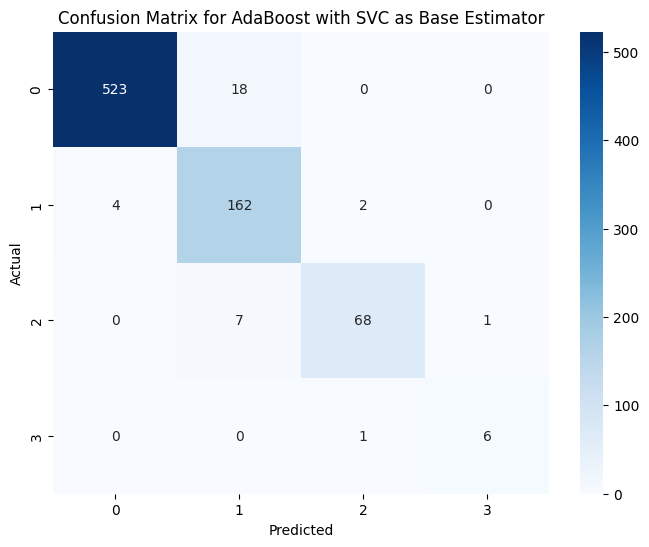

In [17]:
cm_ada = confusion_matrix(y_test, ada_model.predict(X_test_scaled))
plt.figure(figsize=(8,6))
sns.heatmap(cm_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost with SVC as Base Estimator')
plt.show()

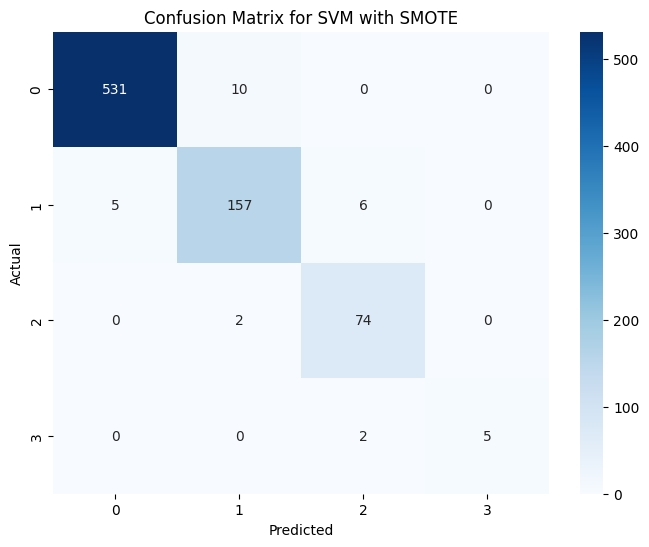

In [18]:
# Confusion matrix for SVM with SMOTE
y_pred = svm_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with SMOTE')
plt.show()

### **OvR Prob distribution and ROC AUC score**

In [20]:
# get probability estimates for each model 
y_prob_svc = svm_model.predict_proba(X_test_scaled)
y_prob_ada = ada_model.predict_proba(X_test_scaled)

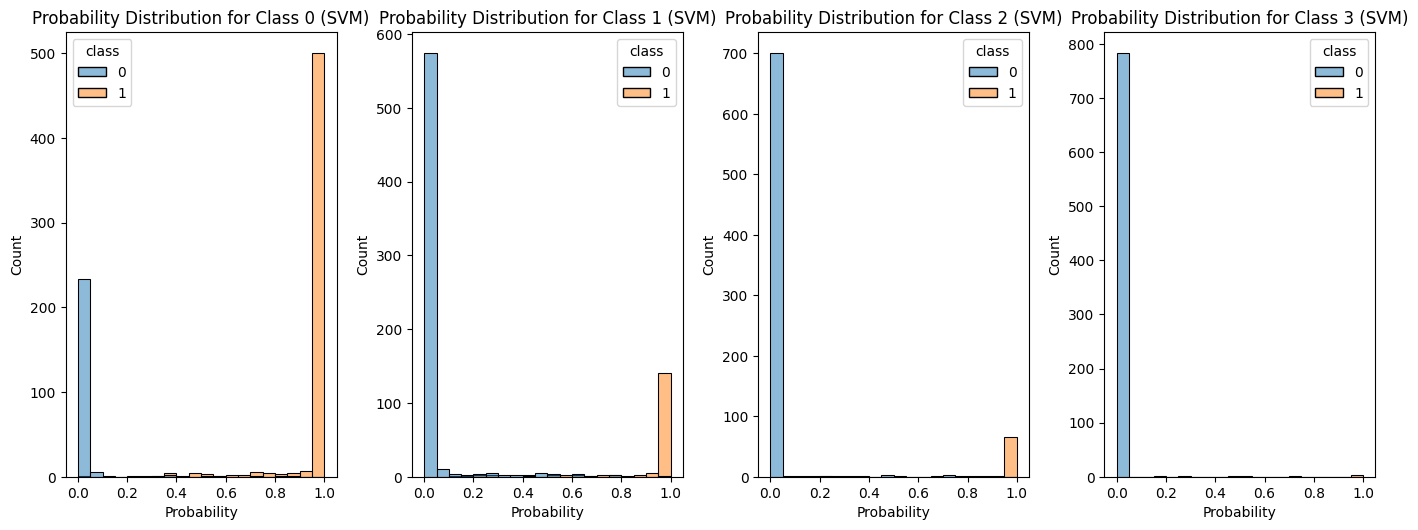

In [21]:
#### **ROC-AUC (OVR & OVO)**
# probability distribution for SVM
from sklearn.metrics import roc_curve, auc

class_list = [0, 1, 2, 3]

plt.figure(figsize=(14, 10))
bins = [i/20 for i in range(20)] + [1.0]
roc_auc_ovr_svm = {}
roc_auc_ovr_ada = {}

# Convert y_test to numpy array for consistency
y_test_array = np.array(y_test)

for i in range(len(class_list)):
    c = class_list[i]

    # Create DataFrame for plotting - X_test is already original unscaled data
    df_aux = pd.DataFrame()
    df_aux['class'] = [1 if label == c else 0 for label in y_test_array]
    df_aux['prob_svm'] = y_prob_svc[:, i]
    df_aux = df_aux.reset_index(drop=True)

    # Plot histogram
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(data=df_aux, x='prob_svm', hue='class', color='b', ax=ax, bins=bins)
    ax.set_title(f'Probability Distribution for Class {c} (SVM)')
    ax.set_xlabel('Probability')

plt.tight_layout()
plt.show()

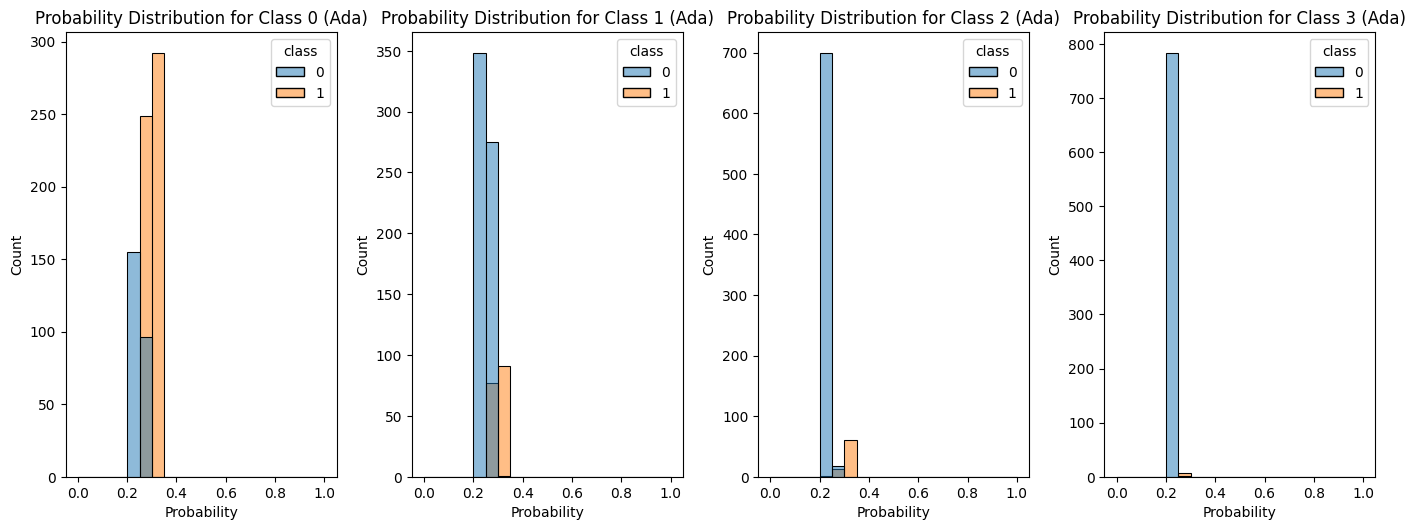

In [29]:
#### **ROC-AUC (OVR & OVO)**
# probability distribution for ada boost

class_list = [0, 1, 2, 3]

plt.figure(figsize=(14, 10))
bins = [i/20 for i in range(20)] + [1.0]
roc_auc_ovr_svm = {}
roc_auc_ovr_ada = {}

# Convert y_test to numpy array for consistency
y_test_array = np.array(y_test)

for i in range(len(class_list)):
    c = class_list[i]

    # Create DataFrame for plotting - X_test is already original unscaled data
    df_aux = pd.DataFrame()
    df_aux['class'] = [1 if label == c else 0 for label in y_test_array]
    df_aux['prob_ada'] = y_prob_ada[:, i]
    df_aux = df_aux.reset_index(drop=True)

    # Plot histogram
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(data=df_aux, x='prob_ada', hue='class', color='b', ax=ax, bins=bins)
    ax.set_title(f'Probability Distribution for Class {c} (Ada)')
    ax.set_xlabel('Probability')

plt.tight_layout()
plt.show()

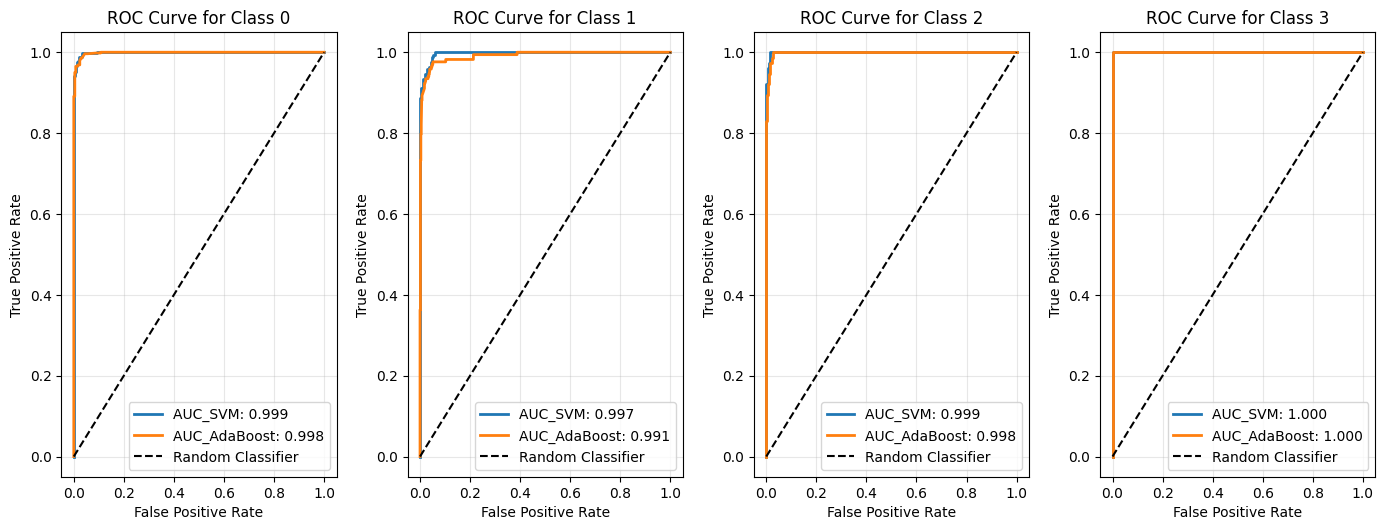

ROC-AUC Scores (One-vs-Rest):
Class 0 (SVM): 0.9990
Class 1 (SVM): 0.9969
Class 2 (SVM): 0.9992
Class 3 (SVM): 0.9998
Class 0 (AdaBoost): 0.9984
Class 1 (AdaBoost): 0.9908
Class 2 (AdaBoost): 0.9983
Class 3 (AdaBoost): 0.9996


In [23]:
# roc auc ovr ada & svm
class_list = [0, 1, 2, 3]

plt.figure(figsize=(14, 10))
bins = [i/20 for i in range(20)] + [1.0]
roc_auc_ovr_svm = {}
roc_auc_ovr_ada = {}

# Convert y_test to numpy array for consistency
y_test_array = np.array(y_test)

for i in range(len(class_list)):
    c = class_list[i]

    # Create DataFrame for plotting - X_test is already original unscaled data
    df_aux = pd.DataFrame()
    df_aux['class'] = [1 if label == c else 0 for label in y_test_array]
    df_aux['prob_svm'] = y_prob_svc[:, i]
    df_aux['prob_ada'] = y_prob_ada[:, i]
    df_aux = df_aux.reset_index(drop=True)

    # Plot ROC curve
    ax_bottom = plt.subplot(2, 4, i+1)
    fpr_svm, tpr_svm, _ = roc_curve(df_aux['class'], df_aux['prob_svm'])
    fpr_ada, tpr_ada, _ = roc_curve(df_aux['class'], df_aux['prob_ada'])
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    roc_auc_ada = auc(fpr_ada, tpr_ada)
    roc_auc_ovr_svm[c] = roc_auc_svm
    roc_auc_ovr_ada[c] = roc_auc_ada

    ax_bottom.plot(fpr_svm, tpr_svm, label=f'AUC_SVM: {roc_auc_svm:.3f}', linewidth=2)
    ax_bottom.plot(fpr_ada, tpr_ada, label=f'AUC_AdaBoost: {roc_auc_ada:.3f}', linewidth=2)
    ax_bottom.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    ax_bottom.set_xlabel('False Positive Rate')
    ax_bottom.set_ylabel('True Positive Rate')
    ax_bottom.set_title(f'ROC Curve for Class {c}')
    ax_bottom.legend()
    ax_bottom.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print AUC scores
print("ROC-AUC Scores (One-vs-Rest):")
for label, auc_score in roc_auc_ovr_svm.items():
    print(f"Class {label} (SVM): {auc_score:.4f}")
for label, auc_score in roc_auc_ovr_ada.items():
    print(f"Class {label} (AdaBoost): {auc_score:.4f}")

### **OvO Probability Distribution and ROC AUC score**

In [24]:
# make combinations of class_list for OVO
combine_labels = []
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        combine_labels.append([class_list[i], class_list[j]])
        combine_labels.append([class_list[j], class_list[i]])


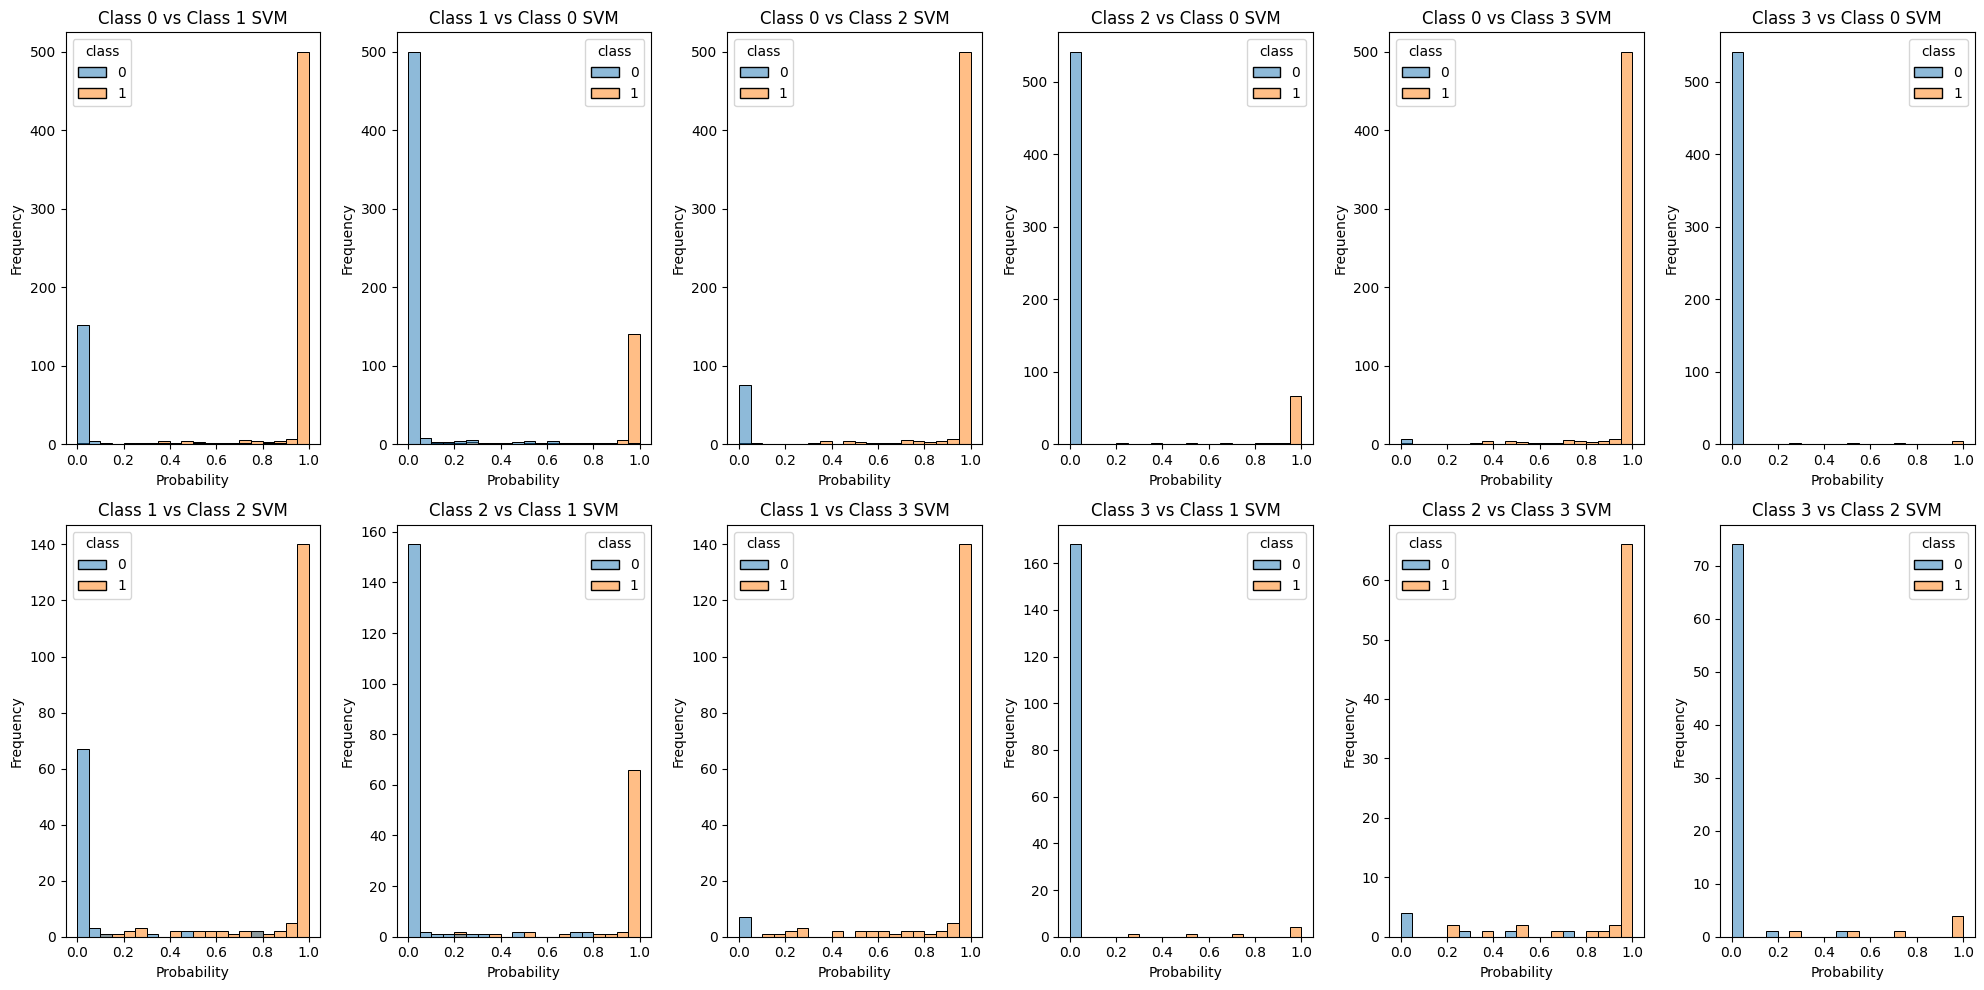

In [ ]:
# probability distribution for SVM 
bins = [i/20 for i in range(20)] + [1.0]
plt.figure(figsize=(20, 10))
for i in range(len(combine_labels)):
    labels = combine_labels[i]
    df_aux = pd.DataFrame()
    c1 = labels[0]
    c2 = labels[1]
    title = f'Class {c1} vs Class {c2}'
    c1_index = class_list.index(c1)

    df_aux['class'] = y_test
    df_aux['prob_svc'] = y_prob_svc[:, c1_index]

    # slicing df aux just for c1 and c2
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if label == c1 else 0 for label in df_aux['class']]
    df_aux = df_aux.reset_index(drop=True)

    # plot histogram
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(data=df_aux, x='prob_svc', hue='class', color='b', ax=ax, bins=bins)
    ax.set_title(f'{title} SVM')
    ax.set_xlabel('Probability')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

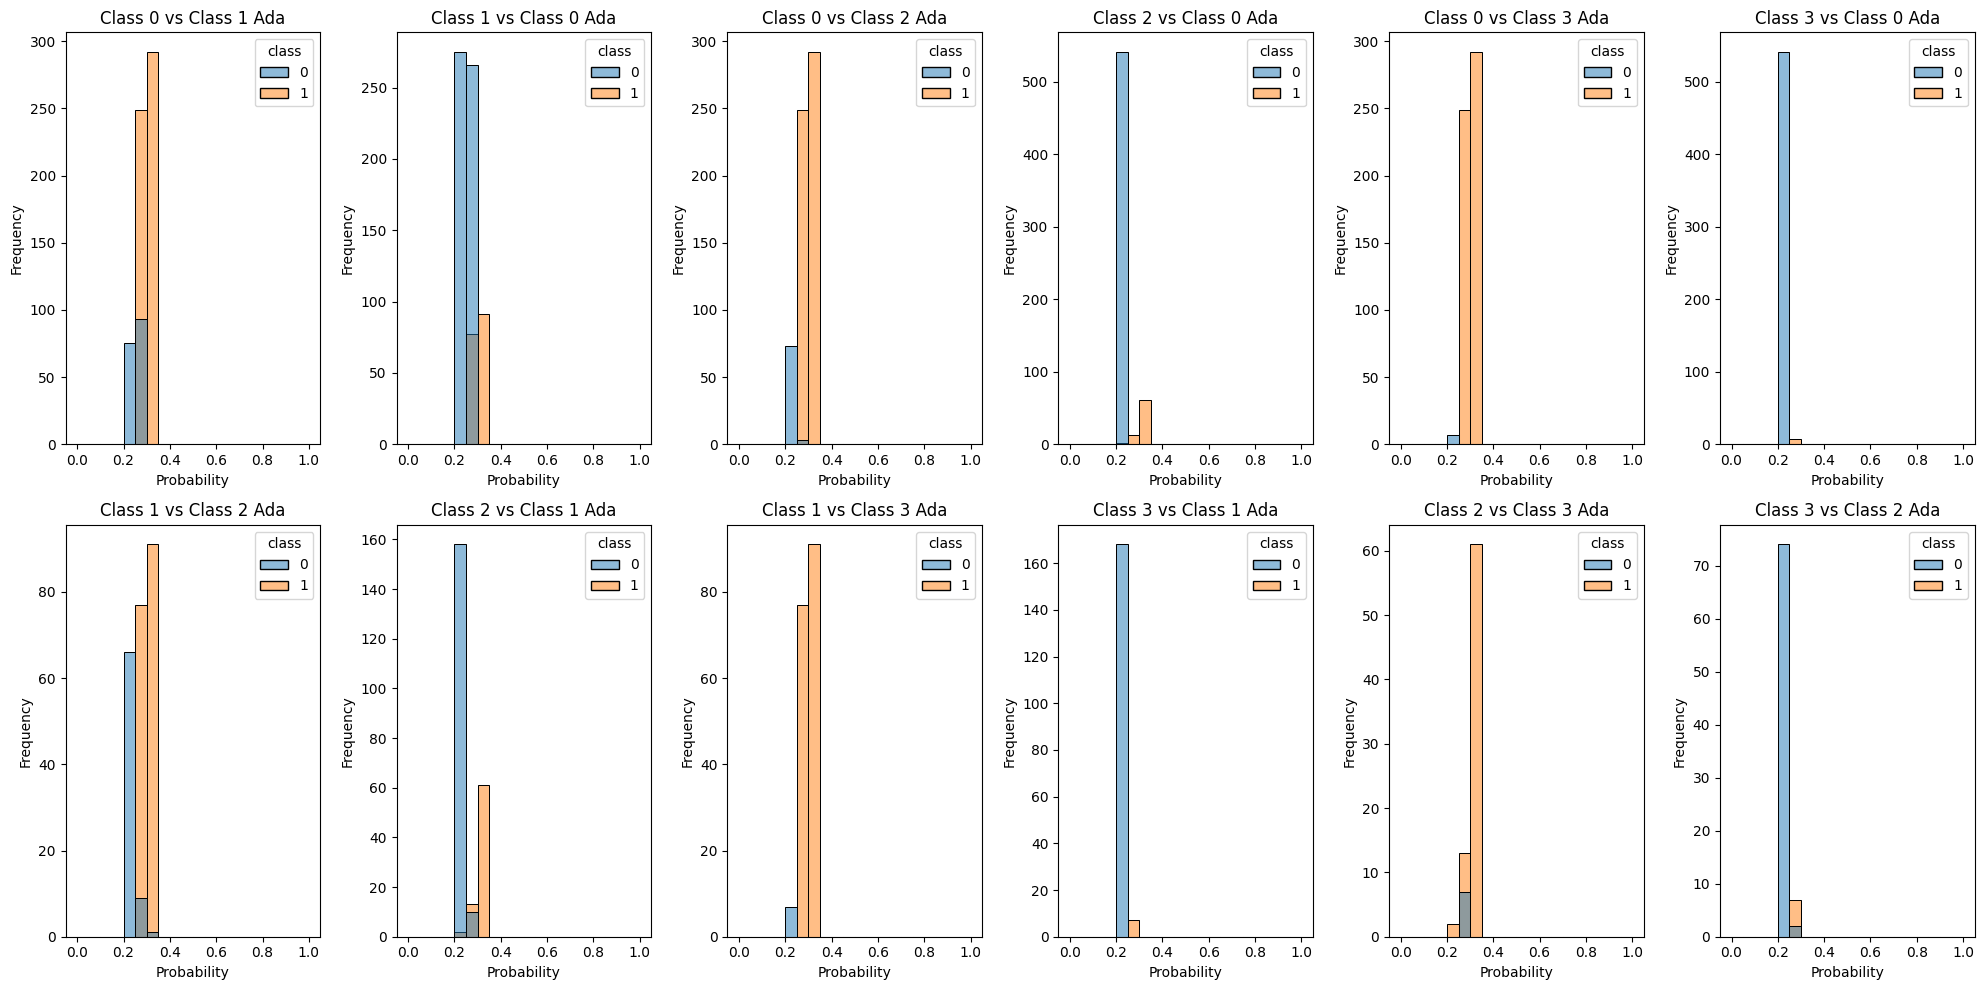

In [ ]:
# probability distribution for SVM 
bins = [i/20 for i in range(20)] + [1.0]
plt.figure(figsize=(20, 10))
for i in range(len(combine_labels)):
    labels = combine_labels[i]
    df_aux = pd.DataFrame()
    c1 = labels[0]
    c2 = labels[1]
    title = f'Class {c1} vs Class {c2}'
    c1_index = class_list.index(c1)

    df_aux['class'] = y_test
    df_aux['prob_svc'] = y_prob_ada[:, c1_index]

    # slicing df aux just for c1 and c2
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if label == c1 else 0 for label in df_aux['class']]
    df_aux = df_aux.reset_index(drop=True)

    # plot histogram
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(data=df_aux, x='prob_svc', hue='class', color='b', ax=ax, bins=bins)
    ax.set_title(f'{title} Ada')
    ax.set_xlabel('Probability')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

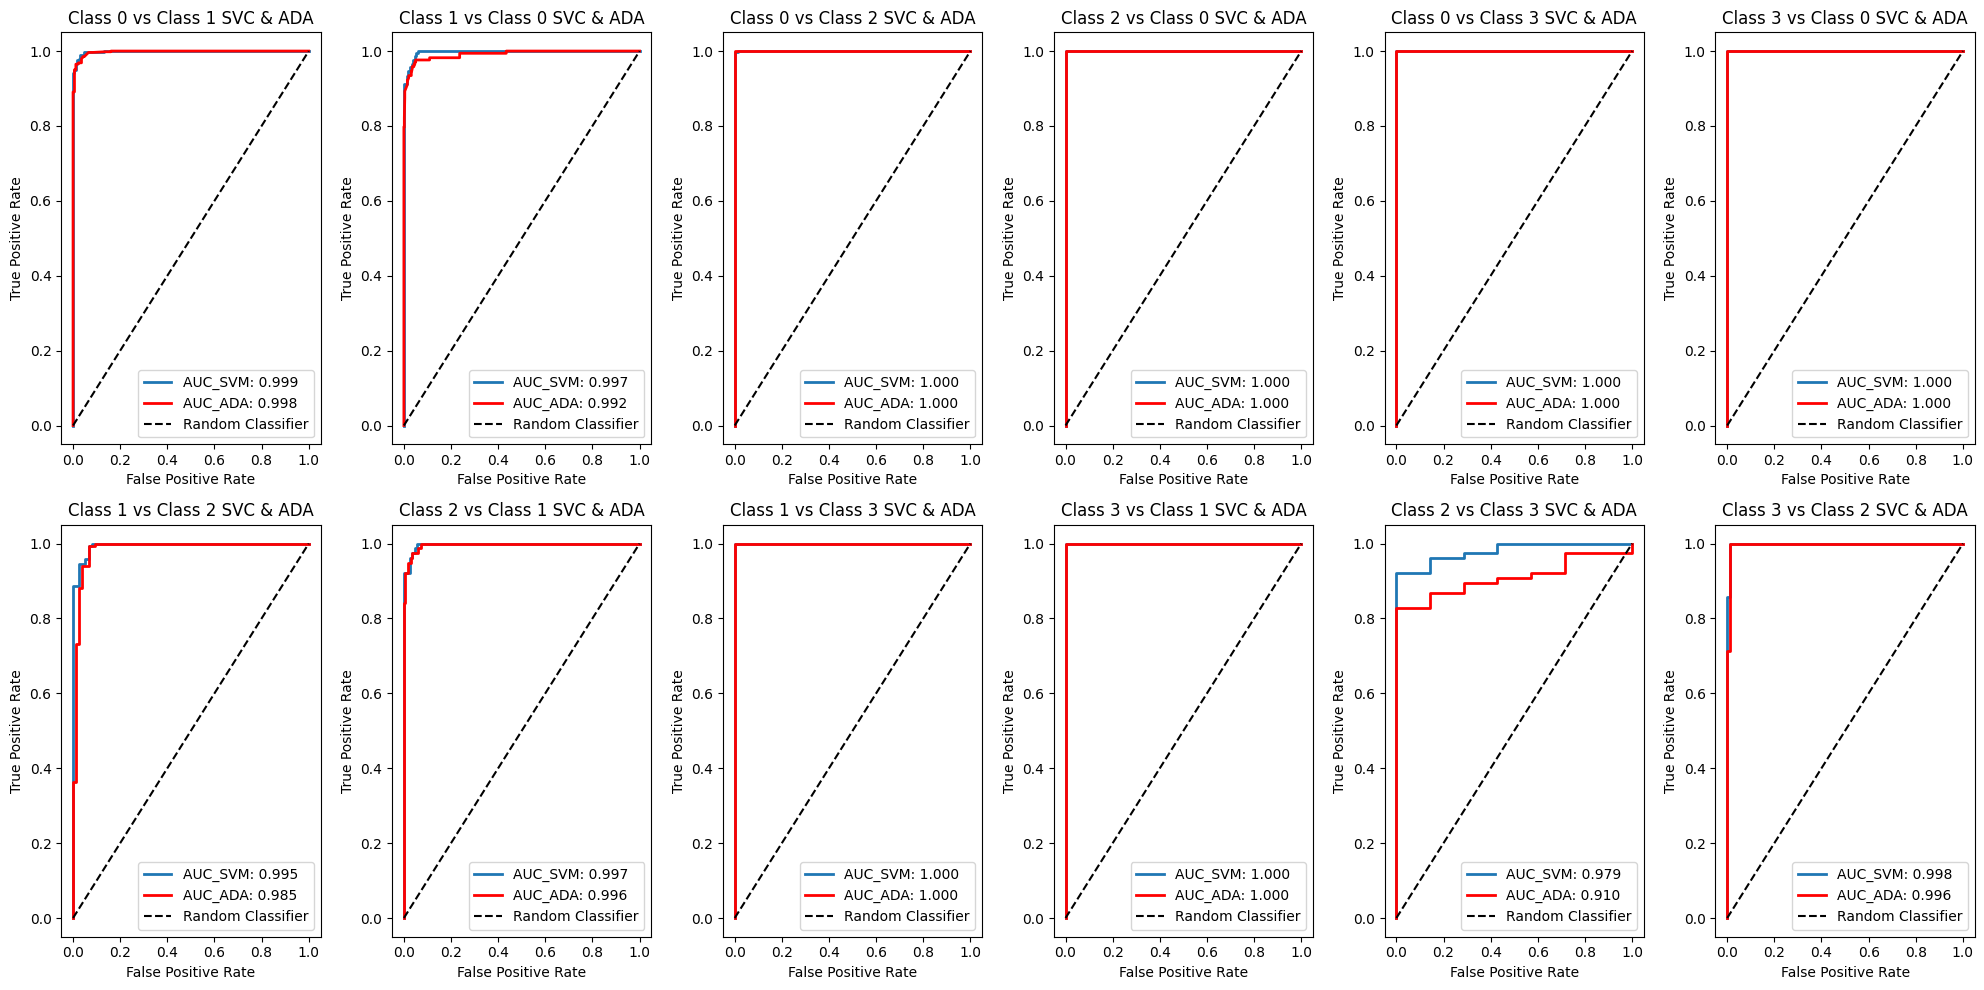

ROC-AUC Scores (One-vs-One):
Class 0 vs Class 1 (SVM): 0.9985
Class 1 vs Class 0 (SVM): 0.9971
Class 0 vs Class 2 (SVM): 1.0000
Class 2 vs Class 0 (SVM): 1.0000
Class 0 vs Class 3 (SVM): 1.0000
Class 3 vs Class 0 (SVM): 1.0000
Class 1 vs Class 2 (SVM): 0.9950
Class 2 vs Class 1 (SVM): 0.9973
Class 1 vs Class 3 (SVM): 1.0000
Class 3 vs Class 1 (SVM): 1.0000
Class 2 vs Class 3 (SVM): 0.9793
Class 3 vs Class 2 (SVM): 0.9981
Class 0 vs Class 1 (ADA): 0.9976
Class 1 vs Class 0 (ADA): 0.9915
Class 0 vs Class 2 (ADA): 1.0000
Class 2 vs Class 0 (ADA): 1.0000
Class 0 vs Class 3 (ADA): 1.0000
Class 3 vs Class 0 (ADA): 1.0000
Class 1 vs Class 2 (ADA): 0.9848
Class 2 vs Class 1 (ADA): 0.9965
Class 1 vs Class 3 (ADA): 1.0000
Class 3 vs Class 1 (ADA): 1.0000
Class 2 vs Class 3 (ADA): 0.9098
Class 3 vs Class 2 (ADA): 0.9962


In [28]:
bins = [i/20 for i in range(20)] + [1.0]
roc_auc_ovo_svm = {}
roc_auc_ovo_ada = {}
plt.figure(figsize=(20, 10))
for i in range(len(combine_labels)):
    labels = combine_labels[i]
    df_aux = pd.DataFrame()
    c1 = labels[0]
    c2 = labels[1]
    title = f'Class {c1} vs Class {c2}'
    c1_index = class_list.index(c1)

    df_aux['class'] = y_test
    df_aux['prob_svc'] = y_prob_svc[:, c1_index]
    df_aux['prob_ada'] = y_prob_ada[:, c1_index]

    # slicing df aux just for c1 and c2
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if label == c1 else 0 for label in df_aux['class']]
    df_aux = df_aux.reset_index(drop=True)

    # plot ROC curve
    ax_bottom = plt.subplot(2, 6, i+1)
    fpr_svc, tpr_svc, _ = roc_curve(df_aux['class'], df_aux['prob_svc'])
    fpr_ada, tpr_ada, _ = roc_curve(df_aux['class'], df_aux['prob_ada'])
    roc_auc_svm = auc(fpr_svc, tpr_svc)
    roc_auc_ovo_svm[title] = roc_auc_svm
    roc_auc_ada = auc(fpr_ada, tpr_ada)
    roc_auc_ovo_ada[title] = roc_auc_ada
    ax_bottom.plot(fpr_svc, tpr_svc, label=f'AUC_SVM: {roc_auc_svm:.3f}', linewidth=2)
    ax_bottom.plot(fpr_ada, tpr_ada, label=f'AUC_ADA: {roc_auc_ada:.3f}', linewidth=2,  color='r')
    ax_bottom.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    ax_bottom.set_xlabel('False Positive Rate')
    ax_bottom.set_ylabel('True Positive Rate')
    ax_bottom.set_title(f'{title} SVC & ADA')
    ax_bottom.legend()

plt.tight_layout()
plt.show()
print("ROC-AUC Scores (One-vs-One):")
for label, auc_score in roc_auc_ovo_svm.items():
    print(f"{label} (SVM): {auc_score:.4f}")
for label, auc_score in roc_auc_ovo_ada.items():
    print(f"{label} (ADA): {auc_score:.4f}")